# Imports

In [1]:
from show_quantization import show_quantization
# from show_simple import show_quantization  # use this if for whatever reason you can't install seaborn

import scipy.io
import numpy as np
import random
import matplotlib.pyplot as plt

# Loading data

In [2]:
data = {}
for i in range(1,5):
    df = scipy.io.loadmat(f"data/dataset_{i}.mat")
    data[i-1] = df['X']

# Clustering
## Competitive Learning

In [3]:
def comp_learning(X, Y, n_epochs=100, alpha=0.1, beta=0.99, min_epsilon=1e-3):

    for epoch in range(n_epochs):
        prev_Y = Y.copy()
        
        # Shuffle Data
        np.random.shuffle(X)
        
        # Use up every data point
        for xp in X:
            
            # Find the closest centroid
            index = np.argmin(np.sum((xp-Y)**2, axis=-1))
            
            # Update closest centroid
            yq = Y[index,:]
            Y[index,:] = yq + alpha * (xp - yq)
                
        # Update LR
        alpha = alpha*beta / (alpha+beta)
        
        # 'Intelligent' stopping criterion
        if np.mean(np.abs(prev_Y-Y)) < min_epsilon:
            print(f"Stopped at epoch {epoch}")
            break

    return Y
        

# Initialization

In [4]:
def get_inits(X, Q):
    inits = {}
    mini = np.min(X, axis=0)
    maxi = np.max(X, axis=0)
    
    n_feats = X.shape[-1]
    inits["random"] = np.array([
        np.random.uniform(mini[0],maxi[0],n_feats),
        np.random.uniform(mini[1],maxi[1],n_feats),
    ]).reshape((Q, n_feats))
    inits["sample"] = np.array(random.sample(X.tolist(), Q))

    return inits

# Training & Visualization

------- Dataset 0
---- Function Competitive
-- With init random
Stopped at epoch 179
-- With init sample
Stopped at epoch 173
------- Dataset 1
---- Function Competitive
-- With init random
Stopped at epoch 182
-- With init sample
Stopped at epoch 201
------- Dataset 2
---- Function Competitive
-- With init random
Stopped at epoch 130
-- With init sample
Stopped at epoch 136
------- Dataset 3
---- Function Competitive
-- With init random
Stopped at epoch 122
-- With init sample
Stopped at epoch 129


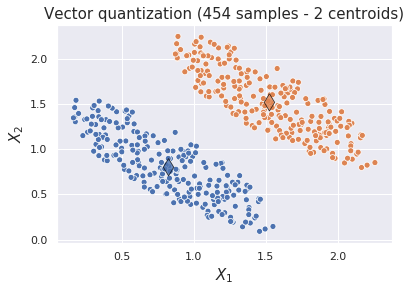

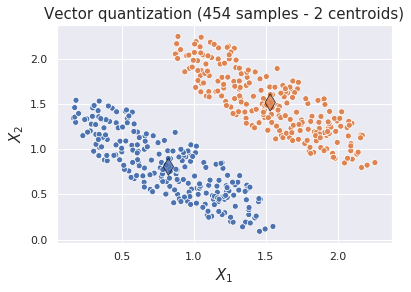

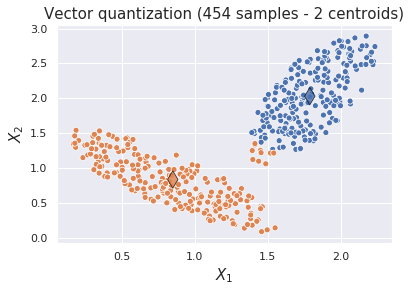

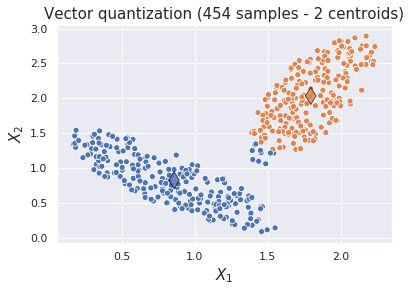

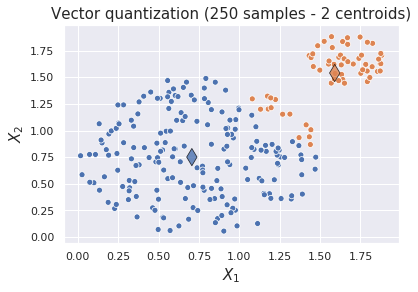

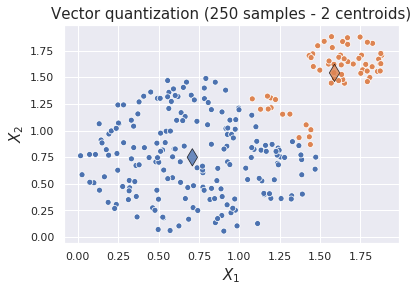

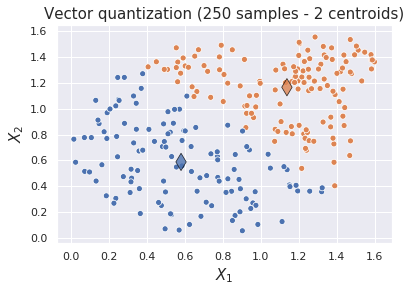

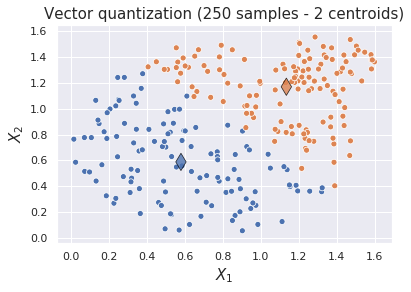

In [6]:
fxs = {"Competitive": comp_learning}
Q = 2
for i, X in data.items():
    print(f"------- Dataset {i}")
    X = np.array(X)
    all_Y = get_inits(X, Q)
    for j, fx in fxs.items():
        print(f"---- Function {j}")
        for k, Y in all_Y.items():
            print(f"-- With init {k}")
            centroids = fx(X, Y, n_epochs=1000)
            show_quantization(X,Y,True)